In [1]:
import pandas as pd
import numpy as np
%reload_ext autoreload
%autoreload 2


In [2]:
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from vis.utils import utils
tf.compat.v1.disable_eager_execution ()

In [8]:
!pip install tf-keras-vis tensorflow

In [4]:
model= tf.keras.models.load_model("model_saved/model_1103_unfreeze_dr0.5/")

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 320, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 rescaling (Rescaling)          (None, 50, 320, 3)   0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 50, 320, 3)   7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 51, 321, 3)   0           ['normalization[0][0]'

 block2b_expand_bn (BatchNormal  (None, 13, 80, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 13, 80, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 13, 80, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 13, 80, 144)  576        ['block2b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 7, 40, 240)  960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 7, 40, 240)  0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 4, 20, 480)   0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 4, 20, 112)   53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_bn (BatchNorma  (None, 4, 20, 112)  448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 4, 20, 112)   0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 4, 20, 112)   0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 4, 20, 672)   75264       ['block5c_add[0][0]']            
                                                                                                  
 block6a_e

                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 2, 10, 1152)  221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 2, 10, 1152)  4608       ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 2, 10, 1152)  0          ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 2, 10, 1152)  28800      ['block6c_expand_activation[0][0]
 D)       

                                                                                                  
 block7a_expand_activation (Act  (None, 2, 10, 1152)  0          ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 2, 10, 1152)  10368      ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 2, 10, 1152)  4608       ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_a

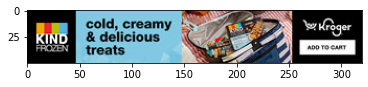

In [38]:
img = load_img('image/0twftnbp_320x50.png', target_size=(50, 320))
plt.imshow(img)
images=np.array(img)
X=preprocess_input(images)
# Convert to BGR, create input with batch_size: 1.
#bgr_img = utils.bgr2rgb(img)
img_input = np.expand_dims(X, axis=0)
#pred = model.predict(X)
#print('Predicted {}'.format(pred))
img_input=img_input.astype(np.float32)

In [9]:
images

array([[[242, 172, 183],
        [242, 172, 183],
        [241, 171, 182],
        ...,
        [251, 219, 220],
        [251, 219, 220],
        [251, 219, 220]],

       [[241, 173, 184],
        [240, 172, 183],
        [242, 172, 183],
        ...,
        [251, 219, 220],
        [251, 219, 220],
        [251, 219, 220]],

       [[242, 174, 185],
        [242, 174, 185],
        [241, 173, 184],
        ...,
        [251, 219, 220],
        [251, 219, 220],
        [251, 219, 220]],

       ...,

       [[255, 224, 235],
        [253, 234, 240],
        [255, 248, 252],
        ...,
        [247, 205, 215],
        [245, 197, 209],
        [244, 194, 206]],

       [[254, 224, 232],
        [255, 228, 236],
        [252, 246, 248],
        ...,
        [246, 200, 210],
        [243, 196, 206],
        [243, 196, 206]],

       [[253, 226, 233],
        [254, 223, 231],
        [254, 224, 234],
        ...,
        [246, 199, 209],
        [246, 196, 207],
        [245, 193, 205]]

In [7]:
X=X.astype(np.float32)

In [48]:
X.dtype

dtype('float32')

In [8]:
img_input=img_input.astype(np.float32)

In [15]:
img_input

array([[[[242., 172., 183.],
         [242., 172., 183.],
         [241., 171., 182.],
         ...,
         [251., 219., 220.],
         [251., 219., 220.],
         [251., 219., 220.]],

        [[241., 173., 184.],
         [240., 172., 183.],
         [242., 172., 183.],
         ...,
         [251., 219., 220.],
         [251., 219., 220.],
         [251., 219., 220.]],

        [[242., 174., 185.],
         [242., 174., 185.],
         [241., 173., 184.],
         ...,
         [251., 219., 220.],
         [251., 219., 220.],
         [251., 219., 220.]],

        ...,

        [[255., 224., 235.],
         [253., 234., 240.],
         [255., 248., 252.],
         ...,
         [247., 205., 215.],
         [245., 197., 209.],
         [244., 194., 206.]],

        [[254., 224., 232.],
         [255., 228., 236.],
         [252., 246., 248.],
         ...,
         [246., 200., 210.],
         [243., 196., 206.],
         [243., 196., 206.]],

        [[253., 226., 233.],
       

In [16]:
import matplotlib.cm as cm
from vis.visualization import visualize_saliency, overlay

#titles = ['right steering', 'left steering', 'maintain steering']
modifiers = ['negate', 'small_values']
for  modifier in enumerate(modifiers):
    heatmap = visualize_saliency(model, layer_idx=-1, filter_indices= 5.988724231719971, 
                                 seed_input=bgr_img)
    plt.figure()
    #plt.title(titles[i])
    # Overlay is used to alpha blend heatmap onto img.
    jet_heatmap = np.uint8(cm.jet(heatmap)[..., :3] * 255)
    plt.imshow(overlay(img, jet_heatmap, alpha=0.7))

TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got 5.988724231719971

In [9]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

In [10]:
from tf_keras_vis.utils.scores import CategoricalScore

# 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
#score = CategoricalScore([1, 294, 413])

# Instead of using CategoricalScore object,
# you can also define the function from scratch as follows:

def score(output):
    # The `output` variable refers to the output of the model,
    # so, in this case, `output` shape is `(3, 1000)` i.e., (samples, classes).
    return output[0][0]

[<tf.Tensor 'Mean_16:0' shape=() dtype=float32>]


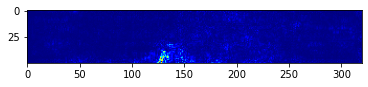

In [39]:
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize

# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=None,
                    clone=True)

# Generate saliency map
saliency_map = saliency(score=lambda outputs: outputs[0][0],seed_input=img_input,normalize_map=True )

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
plt.imshow(saliency_map.squeeze(), cmap='jet')
plt.show()

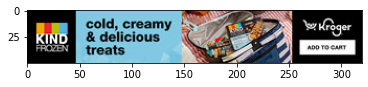

In [40]:
img = load_img('image/0twftnbp_320x50.png', target_size=(50, 320))
plt.imshow(img)

[<tf.Tensor 'Mean_15:0' shape=() dtype=float32>]


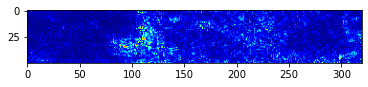

In [37]:
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize

# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=None,
                    clone=True)

# Generate saliency map
saliency_map = saliency(score=lambda outputs: outputs[0][0],seed_input=img_input,normalize_map=True)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
plt.imshow(saliency_map.squeeze(), cmap='jet')
plt.show()

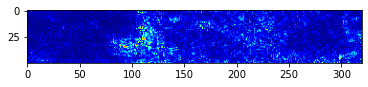

In [35]:
plt.imshow(saliency_map.squeeze(), cmap='jet')

(50, 320, 3)

In [30]:
saliency = Saliency(model,
                    clone=True)

In [6]:
from vis.visualization import visualize_saliency, overlay

In [13]:
from PIL import Image

In [23]:
tuple(range(5))[1:]

(1, 2, 3, 4)

In [ ]:
get_output = theano.function([model.layers[0].input],model.layers[-1].output,allow_input_downcast=True)
fx = theano.function( [model.layers[0].input] ,T.jacobian(model.layers[-1].output.flatten(),model.layers[0].input), allow_input_downcast=True)
grad = fx([input_feature])

In [ ]:
def regression_roc_auc_score(y_true, y_pred, num_rounds = 10000):
  """
  Computes Regression-ROC-AUC-score.
  
  Parameters:
  ----------
  y_true: array-like of shape (n_samples,). Binary or continuous target variable.
  y_pred: array-like of shape (n_samples,). Target scores.
  num_rounds: int or string. If integer, number of random pairs of observations. 
              If string, 'exact', all possible pairs of observations will be evaluated.
  
  Returns:
  -------
  rroc: float. Regression-ROC-AUC-score.
  """
  
  import numpy as np
    
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  num_pairs = 0
  num_same_sign = 0
  
  for i, j in _yield_pairs(y_true, num_rounds):
    diff_true = y_true[i] - y_true[j]
    diff_score = y_pred[i] - y_pred[j]
    if diff_true * diff_score > 0:
      num_same_sign += 1
    elif diff_score == 0:
      num_same_sign += .5
    num_pairs += 1
      
  return num_same_sign / num_pairs


def _yield_pairs(y_true, num_rounds):
  """
  Returns pairs of valid indices. Indices must belong to observations having different values.
  
  Parameters:
  ----------
  y_true: array-like of shape (n_samples,). Binary or continuous target variable.
  num_rounds: int or string. If integer, number of random pairs of observations to return. 
              If string, 'exact', all possible pairs of observations will be returned.
  
  Yields:
  -------
  i, j: tuple of int of shape (2,). Indices referred to a pair of samples.
  
  """
  import numpy as np
  
  if num_rounds == 'exact':
    for i in range(len(y_true)):
      for j in np.where((y_true != y_true[i]) & (np.arange(len(y_true)) > i))[0]:
        yield i, j     
  else:
    for r in range(num_rounds):
      i = np.random.choice(range(len(y_true)))
      j = np.random.choice(np.where(y_true != y_true[i])[0])
      yield i, j